# Titanik Kaggle Uygulaması
Bu uygulama Kaggke da bulunan ....

### About data

### Kütüphaneleri yükle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Veri setini yükle

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 4821-D018

 Directory of C:\Users\emura\Documents\BTK_24_ML\DAY 5

09.03.2024  15:23    <DIR>          .
09.03.2024  11:03    <DIR>          ..
09.03.2024  12:21    <DIR>          .ipynb_checkpoints
18.02.2024  11:58             1.512 classification function.txt
19.02.2024  21:04         8.547.303 Hack Day Titanic Project.pptx
19.02.2024  21:03            10.928 info.docx
22.02.2024  19:53            67.952 kaggle_score.jpg
25.02.2024  08:48             4.094 submission.csv
25.02.2024  08:51             3.258 submission2.csv
25.02.2024  08:57             3.258 submission3.csv
25.02.2024  08:58             3.258 submission4.csv
22.02.2024  19:51             6.086 submit.ipynb
09.03.2024  11:11           160.206 Titanic_task2.ipynb
09.03.2024  15:23           267.255 Titanic-kaggle.ipynb
09.03.2024  12:21            60.719 titanic-task.ipynb
19.02.2024  21:03            28.629 ttest.csv
19.02.2024  21:03            61.194 ttrain.csv


In [3]:
df_train=pd.read_csv('ttrain.csv')
df_test=pd.read_csv('ttest.csv')

### Veri Önişleme

In [4]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
columns_dict = {
    'PassengerId': 'Yolcu kimlik numarası. Her yolcu için benzersiz bir kimlik numarasıdır.',
    'Survived': 'Hayatta kalma durumu. 1, hayatta kalanları; 0, hayatını kaybedenleri temsil eder.',
    'Pclass': 'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.',
    'Name': 'Yolcunun adı.',
    'Sex': 'Cinsiyet. "male" erkekleri, "female" kadınları temsil eder.',
    'Age': 'Yolcunun yaşı. Bazı verilerde eksik değerler bulunabilir (non-null count: 714).',
    'SibSp': 'Yolcunun gemideki kardeş/eş sayısı.',
    'Parch': 'Yolcunun gemideki ebeveyn/çocuk sayısı.',
    'Ticket': 'Bilet numarası.',
    'Fare': 'Bilet ücreti.',
    'Cabin': 'Kabin numarası. Bazı verilerde eksik değerler bulunabilir (non-null count: 204).',
    'Embarked': 'Geminin hangi limandan kalktığı. "C" Cherbourg, "Q" Queenstown, "S" Southampton olarak kodlanmıştır. Bazı verilerde eksik değerler bulunabilir (non-null count: 889).'
}

In [7]:
columns_dict['SibSp']

'Yolcunun gemideki kardeş/eş sayısı.'

In [8]:
df=pd.concat([df_train,df_test])

In [9]:
df_train.shape

(891, 12)

In [10]:
df_test.shape

(418, 11)

In [11]:
df.shape

(1309, 12)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
numeric_columns=df.select_dtypes(include=['number'])

In [16]:
numeric_columns.corr() # Hedef kategorik bir değişken olduğu için korelasyon anlamlı çıkmayabilir

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [18]:
columns_dict['Fare']

'Bilet ücreti.'

In [19]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


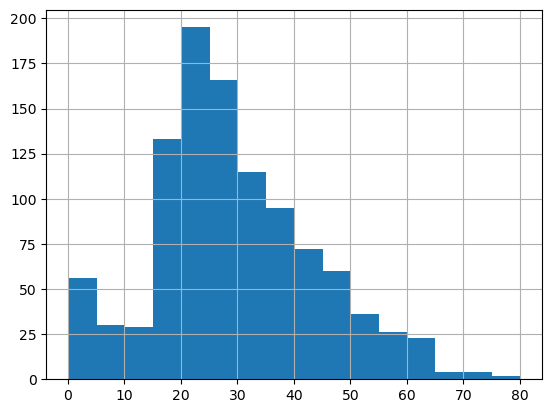

In [20]:
df['Age'].hist(bins=16);

<Axes: >

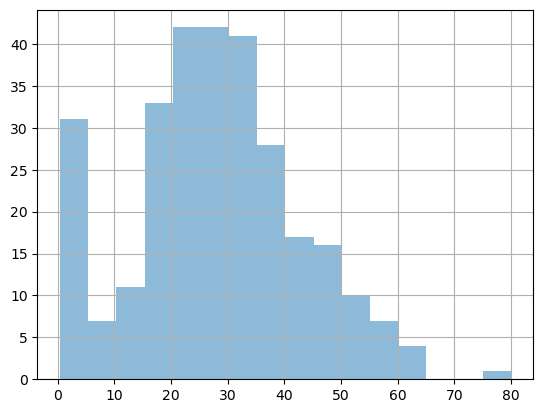

In [21]:
df[df['Survived']==1]['Age'].hist(bins=16, alpha=.5)

In [22]:
df['Survived'].groupby(df['Sex']).value_counts() # saytı olarak

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64

In [23]:
df['Survived'].groupby(df['Sex']).value_counts(normalize=True) # saytı olarak

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

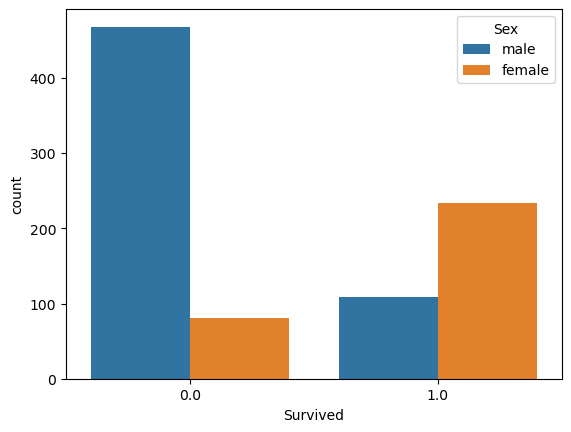

In [24]:
sns.countplot(x='Survived', hue='Sex',data=df)

In [25]:
df['Pclass'].nunique()

3

In [26]:
columns_dict['Pclass']

'Bilet sınıfı. 1, 2 veya 3 olarak kodlanmıştır; 1 birinci sınıfı, 2 ikinci sınıfı ve 3 üçüncü sınıfı temsil eder.'

<Axes: xlabel='Survived', ylabel='count'>

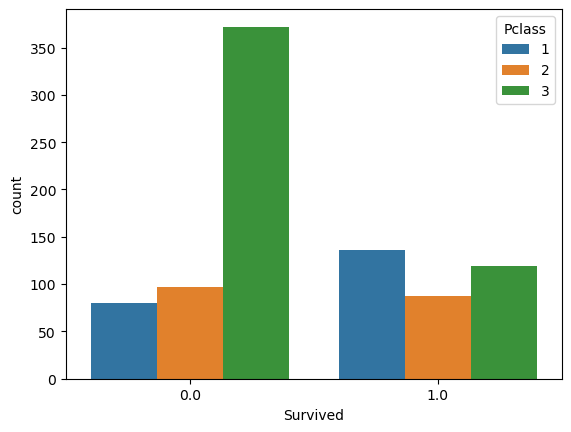

In [27]:
sns.countplot(x='Survived', hue='Pclass',data=df)

In [28]:
df['Survived'].groupby(df['Pclass']).value_counts(normalize=True) # saytı olarak

Pclass  Survived
1       1.0         0.629630
        0.0         0.370370
2       0.0         0.527174
        1.0         0.472826
3       0.0         0.757637
        1.0         0.242363
Name: proportion, dtype: float64

In [29]:
df_2=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female')]

In [30]:
df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1.0,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1.0,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
397,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.0,1,1,13567,79.2000,B41,C
400,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S
402,1294,NaN,1,"Gibson, Miss. Dorothy Winifred",female,22.0,0,1,112378,59.4000,NaN,C
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q


In [31]:
df_3=df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'male')]

In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 1 to 887
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  91 non-null     int64  
 1   Survived     91 non-null     float64
 2   Pclass       91 non-null     int64  
 3   Name         91 non-null     object 
 4   Sex          91 non-null     object 
 5   Age          82 non-null     float64
 6   SibSp        91 non-null     int64  
 7   Parch        91 non-null     int64  
 8   Ticket       91 non-null     object 
 9   Fare         91 non-null     float64
 10  Cabin        78 non-null     object 
 11  Embarked     89 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.2+ KB


In [33]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 1309, dtype: object

In [34]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 23 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  45 non-null     int64  
 1   Survived     45 non-null     float64
 2   Pclass       45 non-null     int64  
 3   Name         45 non-null     object 
 4   Sex          45 non-null     object 
 5   Age          40 non-null     float64
 6   SibSp        45 non-null     int64  
 7   Parch        45 non-null     int64  
 8   Ticket       45 non-null     object 
 9   Fare         45 non-null     float64
 10  Cabin        39 non-null     object 
 11  Embarked     45 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 4.6+ KB


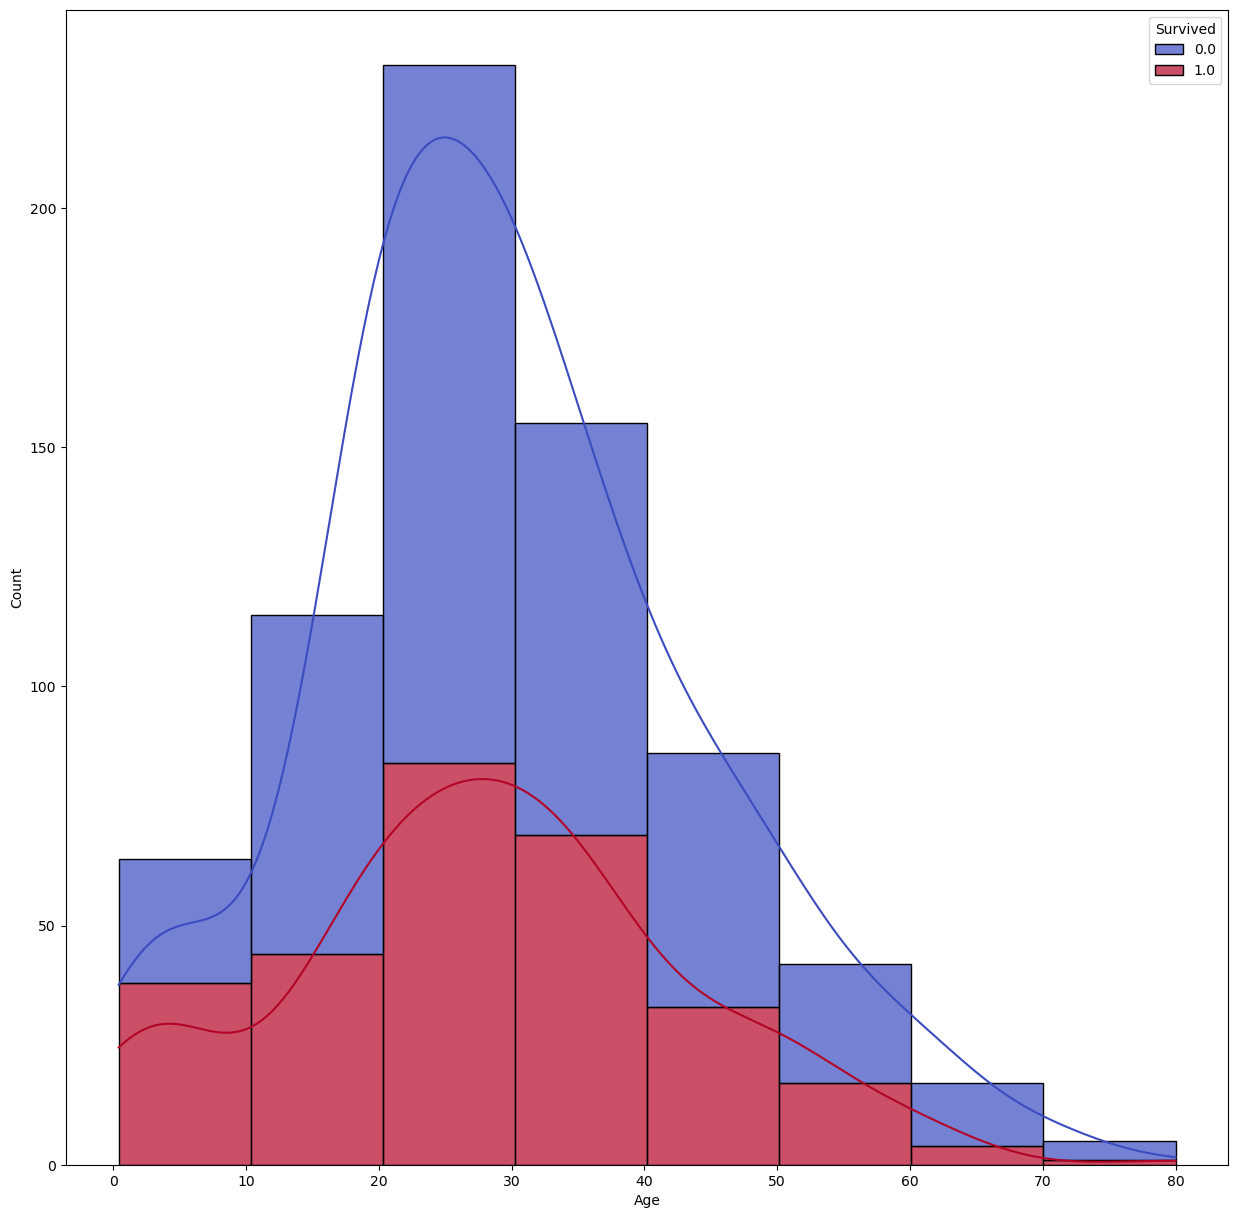

In [35]:
plt.figure(figsize=(15,15))
df_4=df.reset_index(drop=True)
sns.histplot(data=df_4, x='Age', hue='Survived', multiple='stack',
            kde=True, palette='coolwarm', bins=8,
            alpha=.7);

In [36]:
df[df['Age']>=75]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1.0,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.00,A23,S
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [38]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

<Axes: xlabel='Survived', ylabel='count'>

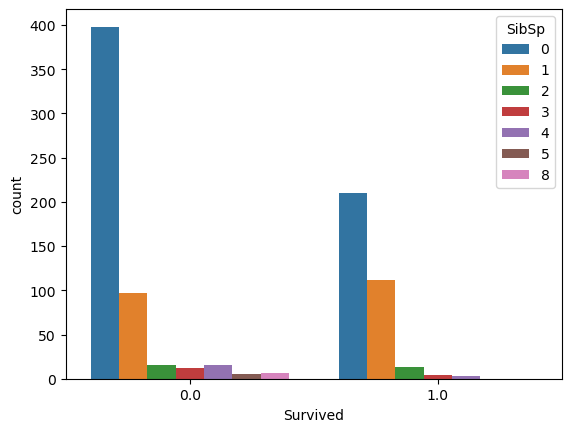

In [39]:
sns.countplot(x='Survived', hue='SibSp',data=df)

In [40]:
df['Survived'].groupby(df['SibSp']).value_counts(normalize=True) # saytı olarak

SibSp  Survived
0      0.0         0.654605
       1.0         0.345395
1      1.0         0.535885
       0.0         0.464115
2      0.0         0.535714
       1.0         0.464286
3      0.0         0.750000
       1.0         0.250000
4      0.0         0.833333
       1.0         0.166667
5      0.0         1.000000
8      0.0         1.000000
Name: proportion, dtype: float64

In [41]:
df['Survived'].groupby(df['SibSp']).value_counts() # saytı olarak

SibSp  Survived
0      0.0         398
       1.0         210
1      1.0         112
       0.0          97
2      0.0          15
       1.0          13
3      0.0          12
       1.0           4
4      0.0          15
       1.0           3
5      0.0           5
8      0.0           7
Name: count, dtype: int64

In [42]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [43]:
df['Survived'].groupby(df['Parch']).value_counts(normalize=True) # saytı olarak

Parch  Survived
0      0.0         0.656342
       1.0         0.343658
1      1.0         0.550847
       0.0         0.449153
2      0.0         0.500000
       1.0         0.500000
3      1.0         0.600000
       0.0         0.400000
4      0.0         1.000000
5      0.0         0.800000
       1.0         0.200000
6      0.0         1.000000
Name: proportion, dtype: float64

In [44]:
df['Survived'].groupby(df['Parch']).value_counts() # saytı olarak

Parch  Survived
0      0.0         445
       1.0         233
1      1.0          65
       0.0          53
2      0.0          40
       1.0          40
3      1.0           3
       0.0           2
4      0.0           4
5      0.0           4
       1.0           1
6      0.0           1
Name: count, dtype: int64

In [45]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [47]:
df['Survived'].groupby(df['Embarked']).value_counts() # saytı olarak

Embarked  Survived
C         1.0          93
          0.0          75
Q         0.0          47
          1.0          30
S         0.0         427
          1.0         217
Name: count, dtype: int64

In [48]:
df['Survived'].groupby(df['Embarked']).value_counts(normalize=True) # saytı olarak

Embarked  Survived
C         1.0         0.553571
          0.0         0.446429
Q         0.0         0.610390
          1.0         0.389610
S         0.0         0.663043
          1.0         0.336957
Name: proportion, dtype: float64

In [49]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [50]:
df['Title']=df['Name'].str.extract('([A-Za-z]+)\.')

In [51]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [52]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

In [53]:
df[df['Name'].str.contains('Capt', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,Mr


In [54]:
df[df['Name'].str.contains('Crosby', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
540,541,1.0,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.00,B22,S,Miss
745,746,0.0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.00,B22,S,Mr
305,1197,NaN,1,"Crosby, Mrs. Edward Gifford (Catherine Elizabe...",female,64.0,1,1,112901,26.55,B26,S,Mrs


In [55]:
df['Title'].value_counts()

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [56]:
df['Age'].groupby(df['Title']).mean()

Title
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [57]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [58]:
#df.groupby(['Title', 'Sex']).value_counts()

In [59]:
df['Age'].isnull().sum()

0

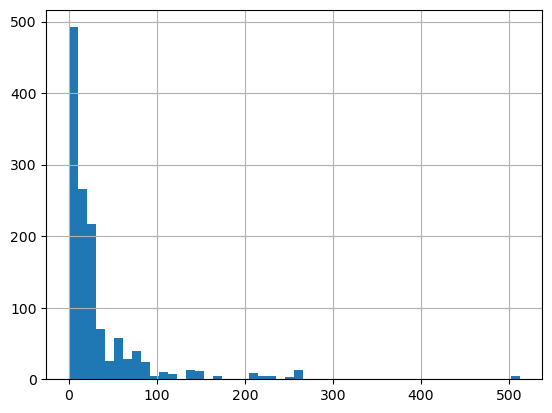

In [60]:
df['Fare'].hist(bins=50);

In [61]:
#df['Fare'].unique()

In [62]:
df.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [63]:
df[df.Fare>512]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [64]:
df.Fare.median()

14.4542

In [65]:
df.Fare.median()

14.4542

In [66]:
df['Fare'].mode()[0]

8.05

In [67]:
df.Fare.mean()

33.29547928134557

In [68]:
df['Fare'].fillna(df['Fare'].mode()[0],inplace=True)

In [69]:
df.Fare.isnull().sum()

0

In [70]:
df.Embarked

0      S
1      C
2      S
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 1309, dtype: object

In [73]:
df['Embarked'].mode()[0]

'S'

In [71]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [72]:
df.Embarked.isnull().sum()

0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [77]:
y=df['Survived']
X=df.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1) 
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,male,22.0,1,0,7.2500,S,Mr
1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,female,26.0,0,0,7.9250,S,Miss
3,1,female,35.0,1,0,53.1000,S,Mrs
4,3,male,35.0,0,0,8.0500,S,Mr


In [81]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   object 
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1309 non-null   float64
 6   Embarked  1309 non-null   object 
 7   Title     1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [80]:
df.info() #orijinal veri seti

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [82]:
X=pd.get_dummies(X,drop_first=True)

In [83]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,True,False,True,False,True,False
1,1,38.0,1,0,71.2833,False,False,False,False,False,True
2,3,26.0,0,0,7.9250,False,False,True,True,False,False
3,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,True,False,True,False,True,False


In [86]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title_Miss    0
Title_Mr      0
Title_Mrs     0
dtype: int64

In [87]:
df_train.shape

(891, 12)

In [90]:
X_train=X[:891]
X_test=X[891:]
y_train=y[:891]
y_test=y[891:]

In [92]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,True


In [91]:
y_test.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

### Building Models

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
#accuaracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [94]:
def model_classification(X,y):
    '''
    X: independent variable
    y: dependent variable
    return best model and its accuracy
    '''
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
    models = [GaussianNB(),BernoulliNB(),LogisticRegression(),RandomForestClassifier(), 
              GradientBoostingClassifier(), KNeighborsClassifier(n_neighbors=5)]
    results=[]
    for model in models:
        model.fit(x_train,y_train)
        model_predict=model.predict(x_test)
        print("Model: ",model)
        print("Model Accuracy: ",accuracy_score(model_predict,y_test))
        print("Model Confusion Matrix: ",confusion_matrix(model_predict,y_test),"\n")
        print("Model Classification Report: ",classification_report(model_predict,y_test))
        print("-"*50)
        results.append(accuracy_score(model_predict,y_test))
    #best model
    best_model=models[results.index(max(results))]
    print("Best Model: ",best_model)
    print("Best Model Accuracy: ",max(results))
    models=pd.DataFrame({
        'Model':['GaussianNB','BernoulliNB','LogisticRegression','RandomForestClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier'],
        'Score':results})
    print(models.sort_values(by='Score', ascending=False, ignore_index=True))
    return best_model,max(results), confusion_matrix(model_predict,y_test)

In [95]:
model_classification(X_train,y_train)

Model:  GaussianNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[132  30]
 [ 25  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       162
         1.0       0.73      0.76      0.75       106

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------------------------------------
Model:  BernoulliNB()
Model Accuracy:  0.7947761194029851
Model Confusion Matrix:  [[134  32]
 [ 23  79]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       166
         1.0       0.71      0.77      0.74       102

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.80      0.79      0.80       268

--------------------

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model:  RandomForestClassifier()
Model Accuracy:  0.7910447761194029
Model Confusion Matrix:  [[131  30]
 [ 26  81]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       161
         1.0       0.73      0.76      0.74       107

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.79      0.79      0.79       268

--------------------------------------------------
Model:  GradientBoostingClassifier()
Model Accuracy:  0.8208955223880597
Model Confusion Matrix:  [[144  35]
 [ 13  76]] 

Model Classification Report:                precision    recall  f1-score   support

         0.0       0.92      0.80      0.86       179
         1.0       0.68      0.85      0.76        89

    accuracy                           0.82       268
   macro avg       0.80      0.83      0.81       268
weighted avg       0.84      0.82      0.82     

(GradientBoostingClassifier(),
 0.8208955223880597,
 array([[130,  50],
        [ 27,  61]], dtype=int64))

In [96]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
y_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [98]:
submission=pd.DataFrame({'PassengerId':df_test['PassengerId'],
                        'Survived':y_pred.astype(int)})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [99]:
submission.to_csv('submission_titanic.csv',index=False)

In [102]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
submission=pd.DataFrame({'PassengerId':df_test['PassengerId'],
                        'Survived':y_pred.astype(int)})
submission.head()
submission.to_csv('lgr_titanic.csv',index=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
